# ANIMATING THE WELL LOG PARAMETERS 

Animating well log parameters in Python involves creating visualizations of data collected from oil and gas wells. This helps geoscientists and engineers understand the properties of the reservoir and make better decisions about drilling and production. By using Python libraries like Matplotlib or Plotly, 3D visualization tools, and interactive models, they can gain deeper insights into the behavior of the reservoir and improve efficiency and profitability in the oil and gas industry.

In the paragraphs that follow, we will explore into the significance of the Log ASCII Standard (LAS) file format in the oil and gas industry, its role in Python-based well log analysis and visualization, and the informations found in LAS file used. We will also take a closer look at the Python code used to create an animated plot of well log data. 

So let's get started.

## Log ASCII Standard (LAS): Importance in the Oil and Gas Industry and in Python Code

Log ASCII Standard (LAS) is a file format commonly used in the oil and gas industry to store well log data. It is a plain text format that consists of a header section and a data section. The header section provides information about the well log, such as the well name, location, date, and the curves measured. The data section contains the actual measurements from the well log.

The LAS format is important in the oil and gas industry because it provides a standardized way of storing and exchanging well log data between different software and hardware systems. This makes it easier for companies to work with well log data from different sources and ensures that the data is interpreted consistently.

In Python, the LAS file format is commonly used in well log analysis and visualization. There are several Python libraries that can read, write, and manipulate LAS files, such as lasio, welly, and striplog. These libraries make it easy to work with well log data in Python and integrate it with other scientific and engineering tools.

## Well Log Information Stored in the LAS File

The LAS file used in this case contains real-time data and provides important information about the well log, including:

- The depth range of the log, from 100.000 to 150.000 meters, with a step size of 0.100000 meters.
- A null value of -999.25, which represents missing or invalid data.
- The name of the well ("Well 123") and field ("North Extension").
- The name of the service company that performed the logging ("Wireline Logging Ltd").
- The location of the well, which is not provided.
- The name of the state ("Luxembourg") and county ("Diekirch") where the well is located.
- The date when the log was recorded ("24-Jun-2013").
- The bit size used during drilling, which was 4.5 inches.

The LAS file also provides information about the different curves measured in the well log, including depth in meters, caliper measurement in millimeters, density measurement in grams per cubic centimeter, gamma ray measurement in API units, and depth pressure transducer measurement in microseconds per foot.

In addition, the LAS file includes some additional information, such as the title of the plot ("Coal Composite"), the permanent datum used for the well log ("Ground Level"), and the run number ("Composite").

## Python Code

The code imports the necessary lasio and Matplotlib libraries and reads well log data from a LAS file. It creates new curves, defines tracks to be plotted, and sets their colors and background. Subplots are created, and y-axis limits are set. A function is defined to update the plot for each frame of the animation.

The animation is created using Matplotlib's FuncAnimation method. The animate function is called on each frame, and the interval argument sets the delay between frames in milliseconds. In this case, the delay is set to 450 milliseconds, and the repeat argument is set to True for continuous looping.

Matplotlib's FFMpegWriter is initialized to save the animation as a video file. The fps argument sets the frames per second of the video, and the codec argument sets the video codec used to compress the video.

The speed of the code depends on factors such as the complexity of the plot, the number of frames, and the computer specifications.

The animate function clears the subplot, sets the color, plots the data up to the current frame, and sets the title and other formatting options.

<IPython.core.display.Javascript object>


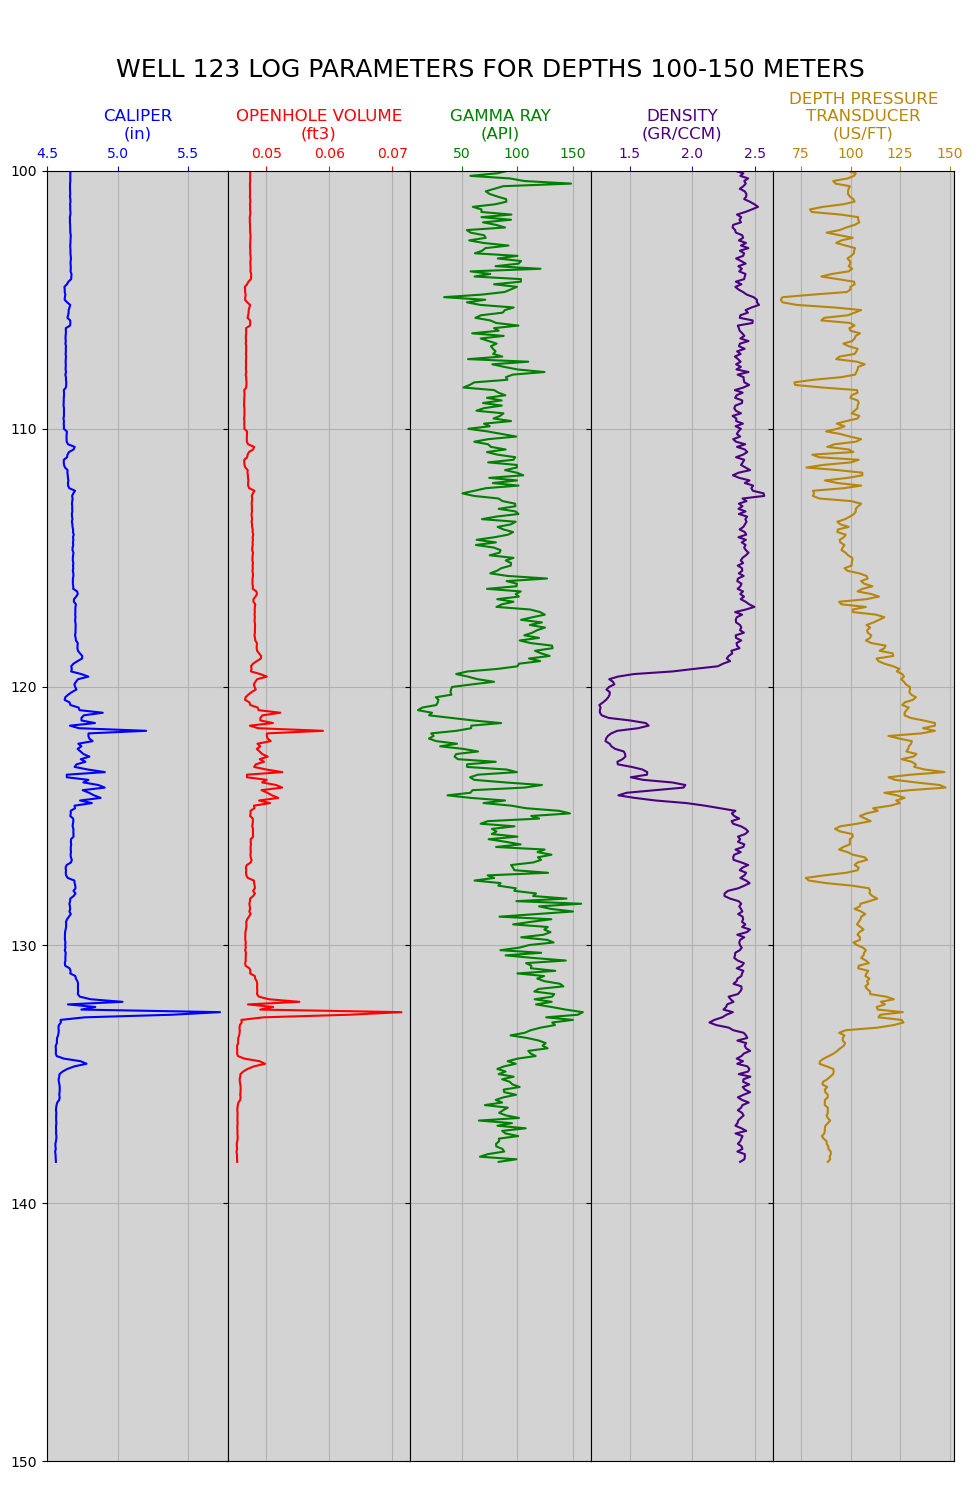

In [1]:
# Import python libraries
import lasio
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

# Read the LAS file
las = lasio.read('caliper.las')

# Create a new curve for caliper in inches
las['CAL-in'] = las['CAL']/(25.6)

# Create a volume curve
interval_step = las.well['step'].value
las['VOL'] = 3.14*las['CAL-in'] * las['CAL-in'] * interval_step /144

# Define the tracks we wish to plot
tracks = ['CAL-in', 'VOL', 'GR','DENS', 'DTP']

# Set track titles
titles = ['CALIPER\n(in)','OPENHOLE VOLUME\n(ft3)','GAMMA RAY\n(API)','DENSITY\n(GR/CCM)','DEPTH PRESSURE\nTRANSDUCER\n(US/FT)']

# Define colors for each track
colors = ['blue', 'red', 'green', 'indigo', 'darkgoldenrod']

# Define the background color for column plots
background_color = 'lightgray'

# Create subplots with one row and multiple columns
fig, axs = plt.subplots(1, len(tracks), sharey=True, figsize=(9.8,15))

# Set y-axis limits for the subplots
ymin = 100
ymax = 150

# Define function to update the plot for each frame of the animation
def animate(i):
    for j, t in enumerate(tracks):
        axs[j].clear()
        axs[j].set_facecolor(background_color)
        axs[j].plot(las[t][:i], las.depth_m[:i], color=colors[j])
        axs[j].set_title(titles[j],color=colors[j])
        axs[j].invert_yaxis()
        axs[j].set_ylim(ymax, ymin)
        axs[j].grid(True)
        axs[j].tick_params(axis='x',colors=colors[j])
        axs[j].xaxis.set_ticks_position("top")
        axs[j].xaxis.set_label_position("top")
        xlabels = axs[j].get_xticklabels()
                    
# Add title to the plot
fig.suptitle("\nWELL 123 LOG PARAMETERS FOR DEPTHS 100-150 METERS\n\n\n", fontsize=18)

# Update layout to adjust figure size
plt.tight_layout()
plt.subplots_adjust(wspace=0)

# Animates figure using Matplotlib with function
anim = animation.FuncAnimation(fig, animate, frames=len(las.depth_m), interval=450, repeat=True)

# Initializes Matplotlib FFMpegWriter for animation
Writer = animation.FFMpegWriter(fps=30, codec='h264')

# Display the animated plot
plt.show()

The Python code above has generated an animated plot which is now being displayed. It was such an awesome plot.

## Feedback Requested: Enhancing the Plot of this Notebook

Thank you for taking the time to read this notebook. I hope you found it informative and learned something new. Your thoughts and feedback on the plot are greatly appreciated. Your input will help improve the notebook and make it more useful for others. Please let me know what you think and how I can make this notebook better.